# Simple modifications of the mach zehnder notebook to calculate with fixed $\theta_{i},i=1,2$ to speed things up a little since here we only care about the values of $\theta$ and $\beta$

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting import plot3d,plot
from mpl_toolkits.mplot3d import Axes3D
init_printing(use_unicode=True)

In [2]:
jones1= Matrix([0,1])
jones0= Matrix([1,0])

In [3]:
theta=Symbol('theta',real=True)
beta=Symbol('beta',real=True)
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=np.pi/(2)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista

def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[1,0],[0,1]])
    A=Matrix([[ 1,0],[0,beta*exp(I*theta)]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*A*K[i]*r)
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
        

def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [4]:
#pabs,pd1,pd2,K=N_Interferomemer(2,2)

In [5]:
#pd1

In [72]:
def con_barra(plot,n):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    cbar=plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99],pad=0.1)
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize=13)
    ax.set_xlabel(r'$\beta$',fontsize=20)
    ax.set_ylabel(r'$\theta$',fontsize=20)
    if n==1:
        ax.set_title(r'$P_{D_{1}}$',fontsize=25)
    elif n==2:
        ax.set_title(r'$P_{D_{2}}$',fontsize=25)
    else:
        ax.set_title(r'$P_{abs}$',fontsize=25)
    plt.yticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)    
    ax.set_zticks([0,0.5,1],[r'$0$',r'$0.5$',r'$1$'])
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(13)
    return plt.show()
def con_barra2(plot,n):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    cbar=plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99])
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(np.arange(-np.pi,np.pi +1, step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$',r'$\pi$'],fontsize=13)
    ax.set_xlabel(r'$\theta_{1}$',fontsize=20)
    ax.set_ylabel(r'$\theta_{2}$',fontsize=20)
    if n==1:
        ax.set_title(r'$P_{D_{1}}$',fontsize=25
                    )
    elif n==2:
        ax.set_title(r'$P_{D_{2}}$',fontsize=25)
    else:
        ax.set_title(r'$P_{abs}$',fontsize=25)
    plt.yticks(np.arange(-np.pi/2,3*np.pi /2 +1, step=np.pi/2),[r'$\frac{-\pi}{/2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi/2}$'],fontsize=13)
    ax.set_zticks([0,0.5,1],[r'$0$',r'$0.5$',r'$1$'])
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(13)
    return plt.show()

In [63]:
#con_barra2(plot3d(pd1.subs({beta:0,theta:pi/4,K[3]:(pi/2)-K[1]-K[2]}),(K[1],-np.pi/2,3*np.pi/2),(K[2],-np.pi/2,3*np.pi/2)),1)

In [85]:
pabs,pd1,pd2,K=N_Interferomemer(5,2)



<IPython.core.display.Javascript object>


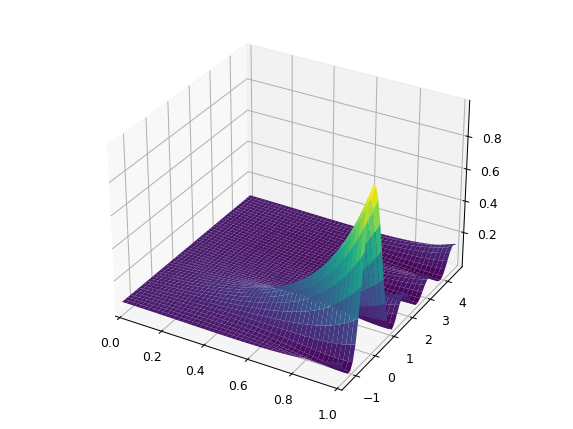

<IPython.core.display.Javascript object>


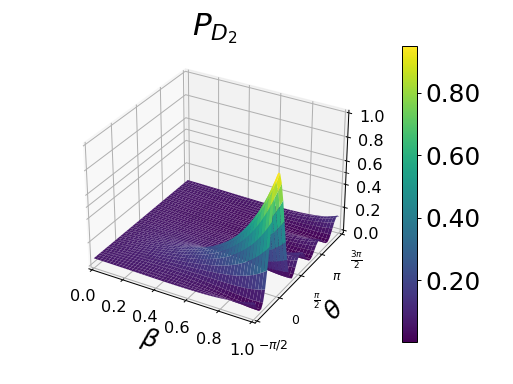

<IPython.core.display.Javascript object>

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [88]:
con_barra(plot3d(pd2,(beta,0,1),(theta,-pi/2,3*pi/2)),2)

In [1]:
#p9d1.expand()

In [3]:
def animacion(N,n):
    AA=[]
    x = np.linspace(-np.pi/2, 3*np.pi/2, 50)
    y = np.linspace(0, 1,50)
    X, Y = np.meshgrid(x, y)
    for i in range(2,N+1):
        pabs,pd1,pd2,K=N_Interferomemer(i,2)
        if n==1:
            pd1=simplify(pd1)
            f=ufuncify((theta,beta),pd1)
            Z= f(X, Y)
        elif n==2:
            pd2=simplify(pd2)
            f=ufuncify((theta,beta),pd2)
            Z= f(X, Y)
        else:
            pabs=simplify(pabs)
            f=ufuncify((theta,beta),pabs)
            Z = f(X, Y)
        AA.append(Z)
    return AA


In [4]:
import matplotlib.animation as animation

In [57]:
from sympy.utilities.autowrap import ufuncify
from sympy.utilities.autowrap import autowrap
f2=ufuncify((theta,beta),pd1)
f3=ufuncify((theta,beta),p3d1)
f4=ufuncify((theta,beta),p4d1)
f5=ufuncify((theta,beta),p5d1)
f6=ufuncify((theta,beta),p6d1)

x = np.linspace(-np.pi/2, 3*np.pi/2, 50)
y = np.linspace(0, 1,50)
X, Y = np.meshgrid(x, y)
Z2 = f2(X, Y)
Z3=f3(X,Y)
Z4=f4(X,Y)
Z5=f5(X,Y)
Z6=f6(X,Y)
Z=[Z2,Z3,Z4,Z5,Z6,Z15]


In [45]:
#f2=ufuncify((theta,beta),p15d1)
a=simplify(p15d1)

In [53]:
f15=ufuncify((theta,beta),a)

In [77]:
Z15=f15(X,Y)

In [58]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z[5], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')
plt.show()

In [25]:
Z=np.load('PD2hastan18.npy')

In [89]:
Z=animacion(5,1)

In [92]:
np.save('archivo.npy',Z)

In [26]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(Y, X, Z[frame_number], cmap="magma")
    ax.set_title(r'$P_{abs} \qquad N=$'+str(frame_number+2),fontsize=20)
x = np.linspace(-np.pi/2, 3*np.pi/2, 50)
y = np.linspace(0, 1,50)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 1 # frame per sec
frn = len(Z) # frame number of the animation
plot = [ax.plot_surface(Y, X, Z[0], color='0.75', rstride=1, cstride=1)]
ax.collections[0].set_cmap('magma')
cbar=plt.colorbar(ax.collections[0],ticks=[0,0.5,1], fraction=1/40)
cbar.ax.tick_params(labelsize=20)
ax.set_yticks(np.arange(-np.pi/2,3*np.pi /2 +1, step=np.pi/2))
ax.set_yticklabels([r'$\frac{-\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'])
ax.set_title(r'$P_{abs} \qquad N=2$',fontsize=20)
ax.set_xlabel(r'$\beta$',fontsize=20)
ax.set_ylabel(r'$\theta$',fontsize=20)
ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)

<IPython.core.display.Javascript object>

In [27]:
fn = 'Pabsn18'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
ani.save(fn+'.gif',writer='imagemagick',fps=fps)

<IPython.core.display.Javascript object>


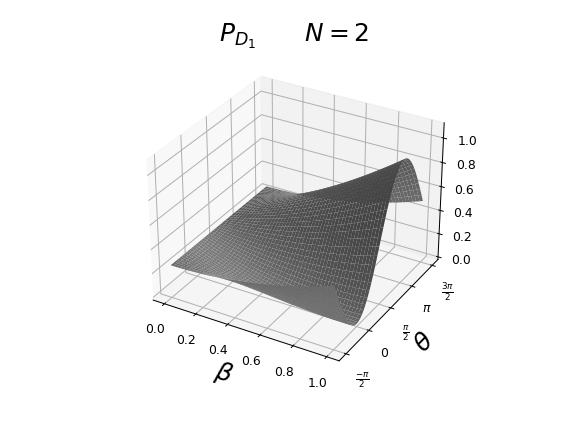

In [84]:
plot_animacion_cool(5,1)

<IPython.core.display.Javascript object>


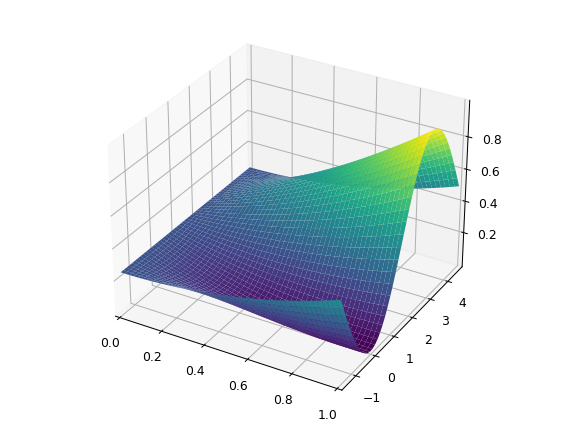

<IPython.core.display.Javascript object>


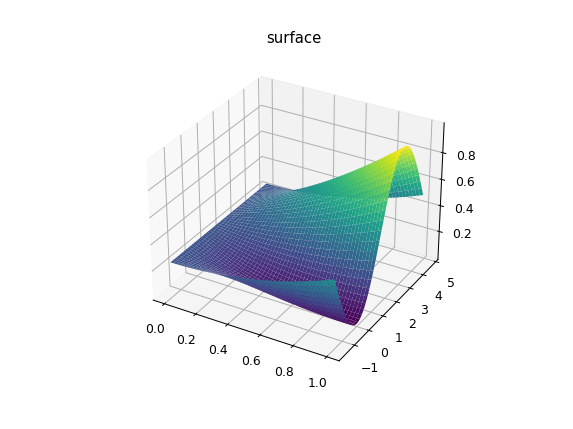

<IPython.core.display.Javascript object>

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [10]:
con_barra(plot3d(pd1,(beta,0,1),(theta,-pi/2,3*pi/2)),1)

In [13]:
p3abs,p3d1,p3d2,K=N_Interferomemer(3,2)

<IPython.core.display.Javascript object>


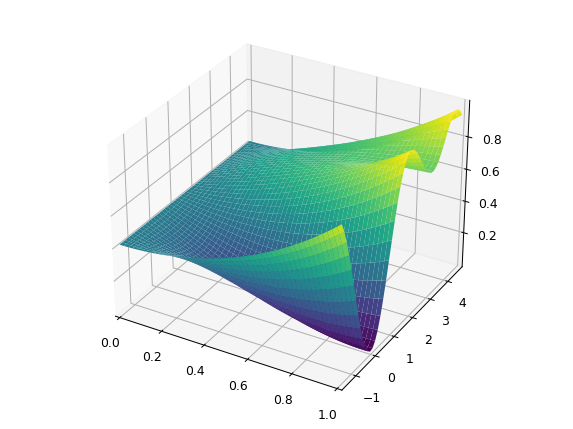

<IPython.core.display.Javascript object>


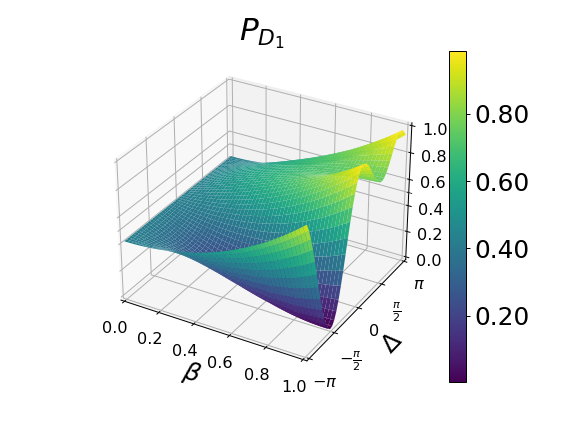

<IPython.core.display.Javascript object>


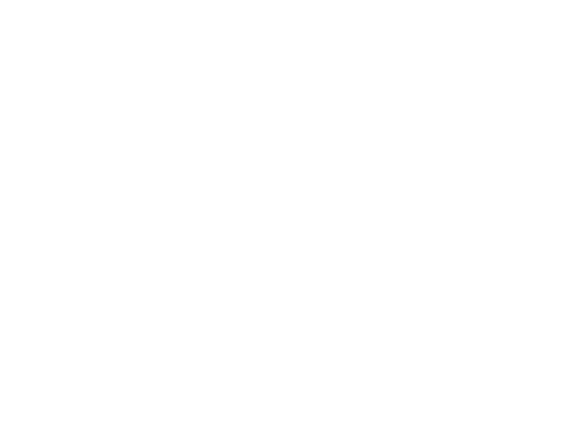

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [14]:
con_barra(plot3d(p3d1,(beta,0,1),(theta,-pi/2,3*pi/2)),1)

<IPython.core.display.Javascript object>


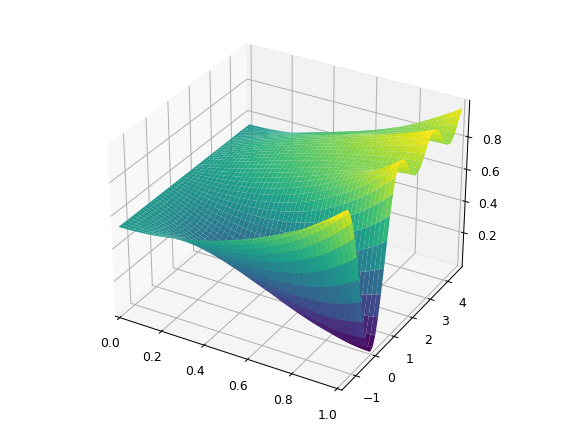

<IPython.core.display.Javascript object>


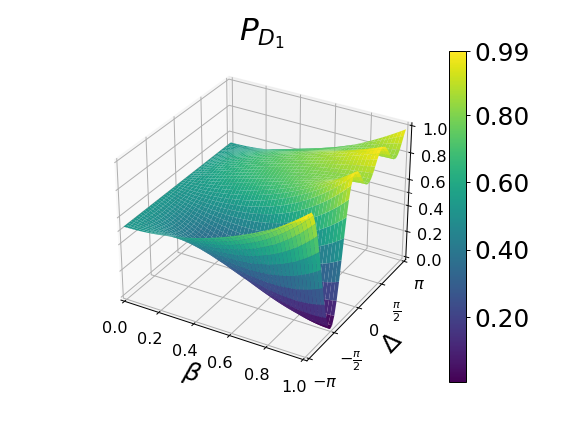

<IPython.core.display.Javascript object>


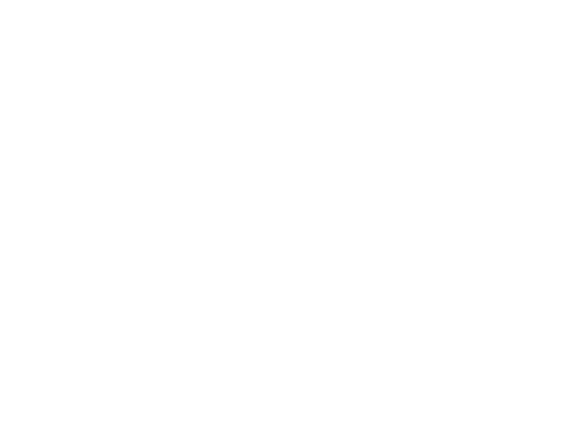

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [16]:
p4abs,p4d1,p4d2,K=N_Interferomemer(4,2)

con_barra(plot3d(p4d1,(beta,0,1),(theta,-pi/2,3*pi/2)),1)

<IPython.core.display.Javascript object>


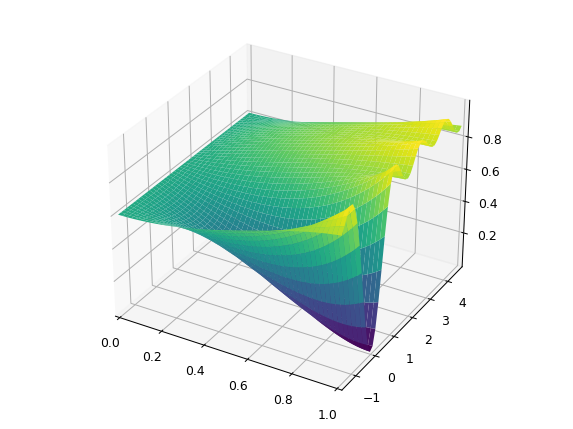

<IPython.core.display.Javascript object>


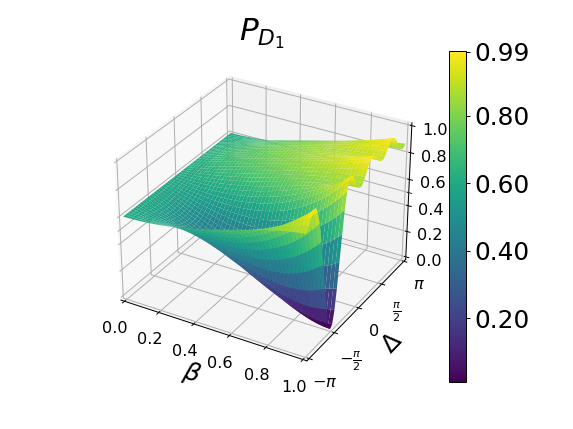

<IPython.core.display.Javascript object>


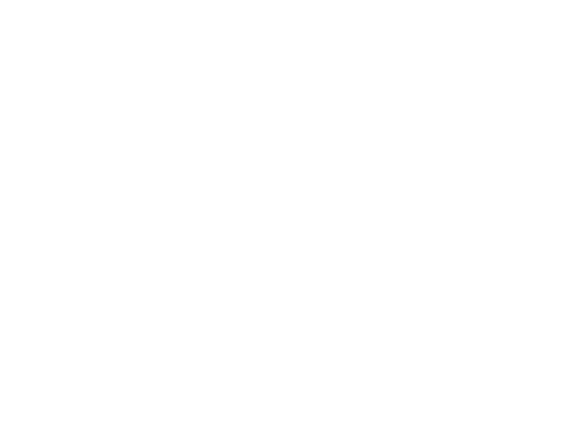

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [18]:
p5abs,p5d1,p5d2,K=N_Interferomemer(5,2)

con_barra(plot3d(p5d1,(beta,0,1),(theta,-pi/2,3*pi/2)),1)

<IPython.core.display.Javascript object>


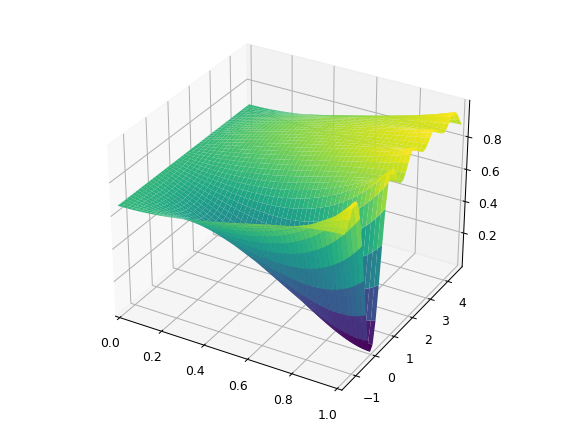

<IPython.core.display.Javascript object>


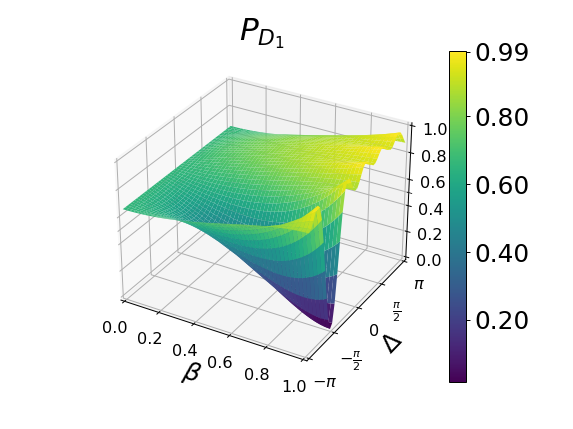

<IPython.core.display.Javascript object>


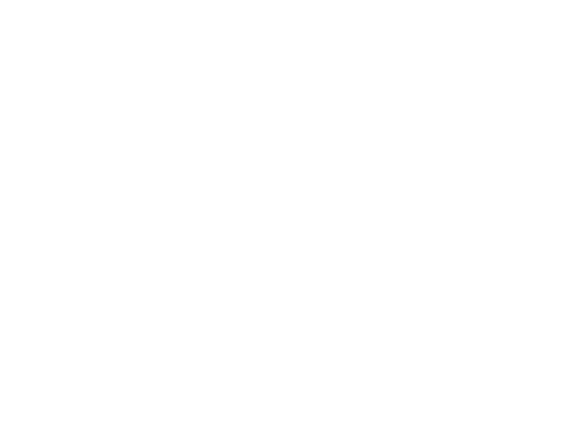

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [20]:
p6abs,p6d1,p6d2,K=N_Interferomemer(6,2)

con_barra(plot3d(p6d1,(beta,0,1),(theta,-pi/2,3*pi/2)),1)

In [6]:
pabs,pd1,pd2,K=N_Interferomemer(3,1)

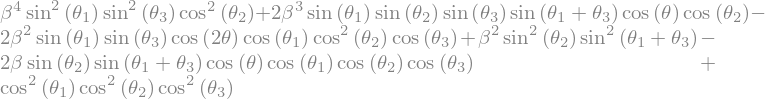

In [7]:
pd1

<IPython.core.display.Javascript object>


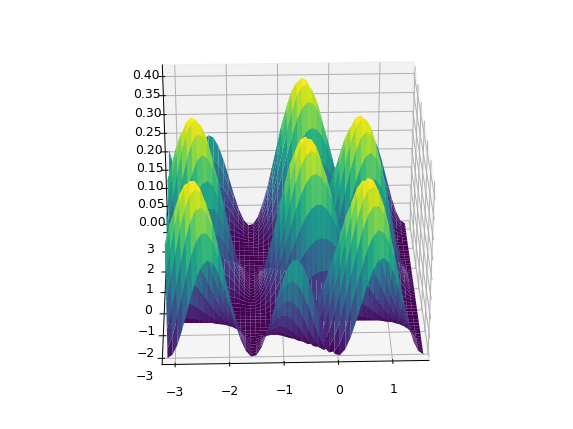

<IPython.core.display.Javascript object>


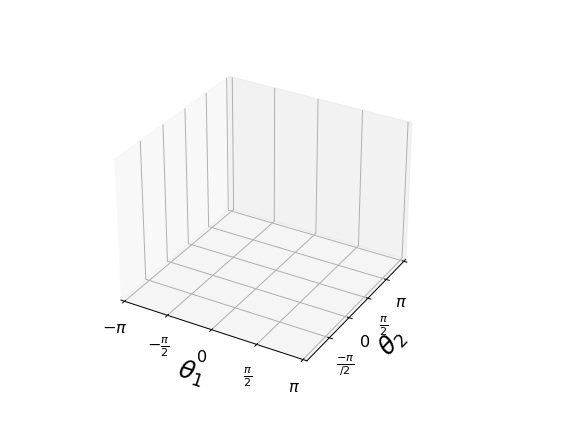

<IPython.core.display.Javascript object>


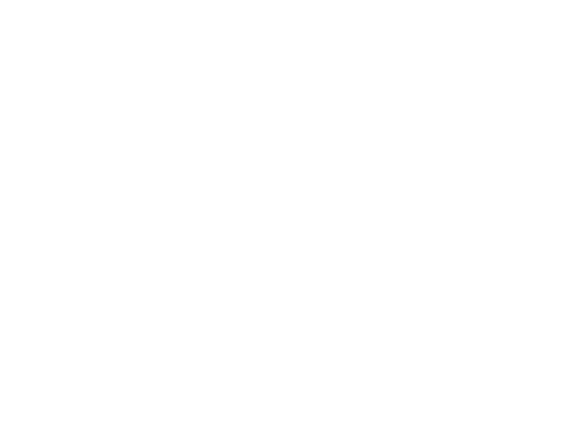

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [45]:
con_barra2(plot3d(pd1.subs({beta:0,theta:0,K[3]:(pi/2)-K[1]-K[2]}),(K[1],-np.pi,np.pi/2),(K[2],-np.pi,np.pi)),1)

In [89]:
theta=Symbol('theta',real=True)
beta=Symbol('beta',real=True)
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=np.pi/(2)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista

def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[1,0],[0,1]])
    A=Matrix([[ 1,0],[0,beta*exp(I*theta)]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*A*K[i]*r)
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
        

def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [90]:
pabs,pd1,pd2,K=N_Interferomemer(3,1)

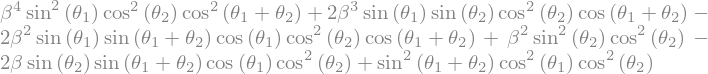

In [91]:
prueba=pd1.subs({K[3]:pi/2-K[1]-K[2],theta:0})
prueba

In [92]:
from sympy.utilities.autowrap import ufuncify
f=ufuncify((beta,K[1],K[2]),prueba)

In [93]:
x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
y = np.linspace(-np.pi/2, 3*np.pi/2, 100)
betas=np.arange(0,1.1,0.1)
X, Y = np.meshgrid(x, y)
Z=[]
for i in range(len(betas)):
    rakata=f(betas[i],Y,X)
    Z.append(rakata)

In [94]:
import matplotlib.animation as animation
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(Y, X, Z[frame_number], cmap="magma")
    ax.set_title(r'$P_{D_{1}} \quad for \quad N=3 \quad and \quad \beta= $'+str(round(betas[frame_number],2)),fontsize=20)

x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
y = np.linspace(-np.pi/2, 3*np.pi/2,100)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 1 # frame per sec
frn = len(Z) # frame number of the animation
plot = [ax.plot_surface(Y, X, Z[0], color='0.75', rstride=1, cstride=1)]
plt.yticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)
plt.xticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)
ax.collections[0].set_cmap('magma')
ax.set_title(r'$P_{abs} \qquad N=2$',fontsize=20)
ax.set_xlabel(r'$\beta$',fontsize=20)
ax.set_ylabel(r'$\theta$',fontsize=20)
ax.set_zlim(0,0.5)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)

<IPython.core.display.Javascript object>

In [95]:
fn = '3thetanopi2'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
ani.save(fn+'.gif',writer='imagemagick',fps=fps)

In [96]:
pabs,pd1,pd2,K=N_Interferomemer(4,1)

In [113]:
prueba=pd1.subs({K[4]:pi/2-K[1]-K[2]-K[3],theta:0})
prueba=prueba.subs(K[3],pi/8)

In [114]:
from sympy.utilities.autowrap import ufuncify
f=ufuncify((beta,K[1],K[2]),prueba)

In [115]:
x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
y = np.linspace(-np.pi/2, 3*np.pi/2, 100)
betas=np.arange(0,1.1,0.1)
X, Y = np.meshgrid(x, y)
Z=[]
for i in range(len(betas)):
    rakata=f(betas[i],Y,X)
    Z.append(rakata)

<IPython.core.display.Javascript object>


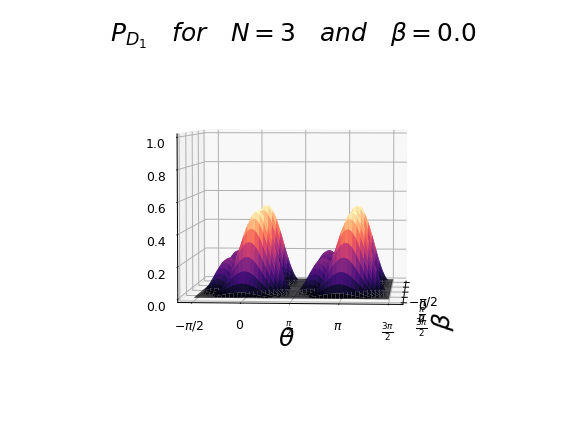

In [116]:
import matplotlib.animation as animation
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(Y, X, Z[frame_number], cmap="magma")
    ax.set_title(r'$P_{D_{1}} \quad for \quad N=3 \quad and \quad \beta= $'+str(round(betas[frame_number],2)),fontsize=20)

x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
y = np.linspace(-np.pi/2, 3*np.pi/2,100)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 1 # frame per sec
frn = len(Z) # frame number of the animation
plot = [ax.plot_surface(Y, X, Z[0], color='0.75', rstride=1, cstride=1)]
plt.yticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)
plt.xticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)
ax.collections[0].set_cmap('magma')
ax.set_title(r'$P_{abs} \qquad N=2$',fontsize=20)
ax.set_xlabel(r'$\beta$',fontsize=20)
ax.set_ylabel(r'$\theta$',fontsize=20)
ax.set_zlim(0,1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)

In [122]:
pabs,pd1,pd2,K=N_Interferomemer(8,1)

In [123]:
prueba=pd1.subs({K[8]:pi/2-K[1]-K[2]-K[3]-K[4]-K[5]-K[6]-K[7],theta:0})
prueba=prueba.subs({K[7]:pi/16,K[6]:pi/16,K[5]:pi/16,K[4]:pi/16,K[3]:pi/16})

In [124]:
from sympy.utilities.autowrap import ufuncify
f=ufuncify((beta,K[1],K[2]),prueba)

In [125]:
x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
y = np.linspace(-np.pi/2, 3*np.pi/2, 100)
betas=np.arange(0,1.1,0.1)
X, Y = np.meshgrid(x, y)
Z=[]
for i in range(len(betas)):
    rakata=f(betas[i],Y,X)
    Z.append(rakata)

<IPython.core.display.Javascript object>


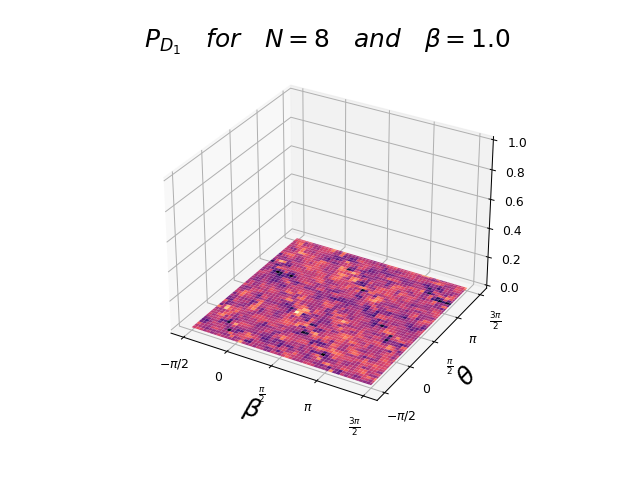

In [127]:
import matplotlib.animation as animation
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(Y, X, Z[frame_number], cmap="magma")
    ax.set_title(r'$P_{D_{1}} \quad for \quad N=8 \quad and \quad \beta= $'+str(round(betas[frame_number],2)),fontsize=20)

x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
y = np.linspace(-np.pi/2, 3*np.pi/2,100)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 1 # frame per sec
frn = len(Z) # frame number of the animation
plot = [ax.plot_surface(Y, X, Z[0], color='0.75', rstride=1, cstride=1)]
plt.yticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)
plt.xticks(np.arange(-np.pi/2,(3*np.pi /2) +1, step=np.pi/2),[r'$-\pi/2$','0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$'],fontsize=10)
ax.collections[0].set_cmap('magma')
ax.set_title(r'$P_{abs} \qquad N=2$',fontsize=20)
ax.set_xlabel(r'$\beta$',fontsize=20)
ax.set_ylabel(r'$\theta$',fontsize=20)
ax.set_zlim(0,1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)

In [128]:
fn = '8thetanopi2'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
ani.save(fn+'.gif',writer='imagemagick',fps=fps)

In [ ]:
pabs,pd1,pd2,K=N_Interferomemer(15,1)

In [ ]:
1/9